## Image Formation, Image Processing, Image Filtering (15pts)
### Nikhil Bhaip (nb5hd)
<em>University of Virginia - Introduction to Computer Vision - Spring 2018 - Vicente Ordonez - vicente@virginia.edu</em><br/><br/>

In this lab we will apply our knowledge in the lectures on Image Formation, Illumination, and Image Processing through a series of excercises focused on practical skills to build more complex applications.

### 1. Image Formation: From World Coordinates to Image Coordinates (5pts).
The objective of this section will be to render a 3d cube. The coordinates for the cube are specified below by the variable cube_pts, and there is also a definition of points to show the world coordinate axes (axes_pts). The camera has a focal length of 3.0, and is located at position (1, 1, 4) and oriented perpendicular to the image plane (no rotation).

In [1]:
# Nikhil Bhaip (nb5hd)

import numpy as np
import matplotlib.pyplot as plt

# Definition of the faces of the cube.
cube_pts = np.array(
               [[[0,0,0], [0,0,1], [0,1,1], [0,1,0], [0,0,0]],   # Face 1.
               [[0,0,0], [0,1,0], [1,1,0], [1,0,0], [0,0,0]],    # Face 2.
               [[1,0,0], [1,0,1], [1,1,1], [1,1,0], [1,0,0]],    # Face 3.
               [[0,0,1], [0,1,1], [1,1,1], [1,0,1], [0,0,1]]])   # Face 4.

# Definition of points to show the world coordinate axes.
axes_pts = np.array([[[0,0,0], [10,0,0]], # X-axis
                     [[0,0,0], [0,10,0]], # Y-axis
                     [[0,0,0], [0,0,10]]]) # Z-axis

**1.1 ** Convert the cube_pts and axes_pts to homegeneous coordinates (1pt)

In [2]:
# #get number of ones needed to be appended
cube_ones_vect =np.ones((4, 5))
cubes_homogen_vect = np.dstack((cube_pts, cube_ones_vect))
print("Cube Homogeneous Coordinates:\n" + str(cubes_homogen_vect))


axes_ones_vect =np.ones((3, 2))
axes_homogen_vect = np.dstack((axes_pts, axes_ones_vect))
print("Axes Homogeneous Coordinates:\n" + str(axes_homogen_vect))


Cube Homogeneous Coordinates:
[[[ 0.  0.  0.  1.]
  [ 0.  0.  1.  1.]
  [ 0.  1.  1.  1.]
  [ 0.  1.  0.  1.]
  [ 0.  0.  0.  1.]]

 [[ 0.  0.  0.  1.]
  [ 0.  1.  0.  1.]
  [ 1.  1.  0.  1.]
  [ 1.  0.  0.  1.]
  [ 0.  0.  0.  1.]]

 [[ 1.  0.  0.  1.]
  [ 1.  0.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  0.  1.]
  [ 1.  0.  0.  1.]]

 [[ 0.  0.  1.  1.]
  [ 0.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  0.  1.  1.]
  [ 0.  0.  1.  1.]]]
Axes Homogeneous Coordinates:
[[[  0.   0.   0.   1.]
  [ 10.   0.   0.   1.]]

 [[  0.   0.   0.   1.]
  [  0.  10.   0.   1.]]

 [[  0.   0.   0.   1.]
  [  0.   0.  10.   1.]]]


**1.2** Define the Camera Matrix C = K [R t] below, where K is the intrinsic camera matrix and [R t] is the extrinsic camera matrix. Keep in mind that the camera has a focal length of 3.0, and is located at position (1, 1, 4) and oriented perpendicular to the image plane (no rotation). (2pts).

In [3]:
# Intrinsic Camera Matrix.
f = 3.0 # focal length.

# assume unit aspect ratio, optical center at (0,0), and no skew
K = np.array([[f, 0, 0],[0,f,0],[0,0,1]])

cam_position = (1, 1, 4)
# Extrinsic Camera Parameters.
Rt = np.array([[1, 0, 0, cam_position[0]],[0, 1, 0, cam_position[1]],[0, 0, 1, cam_position[2]]])

# Camera matrix.
Camera_matrix = np.dot(K, Rt)
print("Camera_matrix is:\n" + str(Camera_matrix))

Camera_matrix is:
[[ 3.  0.  0.  3.]
 [ 0.  3.  0.  3.]
 [ 0.  0.  1.  4.]]


**1.3** Project the cube_pts and axes_pts in homegeneous coordinates to the image plane and convert to cartesian coordinates in 2D (2pts)

In [4]:
# helper function to convert coordinates from homogeneous to cartesian 
def toCartesian(array):
    if(len(array)!=3):
        raise Exception("Size of array input is not equal to 3")
    return np.divide(array, array[2])[:2]

# Project 3D homegeneous coordinates into 2D homegeneous coordinates 
# (cube).
num_faces = cube_pts.shape[2]
proj_cube_homogen = np.zeros((4,5,3))

for i in range(num_faces+1):
    proj_cube_homogen[i] = np.matmul(Camera_matrix, cubes_homogen_vect[i,:,:].T).T

# Convert homogeneous coordinates back to cartesian.
# (cube)
p_cube_pts = np.apply_along_axis(toCartesian, 2, proj_cube_homogen)
print("Projected Cube Points:\n" + str(p_cube_pts))
# Project 3D homegeneous coordinates into 2D homegeneous coordinates
# (axes).
num_axes = axes_pts.shape[2]
proj_axes_homogen = np.zeros((3,2,3))
for i in range(num_axes):
    proj_axes_homogen[i] = np.matmul(Camera_matrix, axes_homogen_vect[i,:,:].T).T

# Convert homogeneous coordinates back to cartesian.
# (axes)
p_axes_pts =  np.apply_along_axis(toCartesian, 2, proj_axes_homogen)
print("\nProjected Axes Points:\n" + str(p_axes_pts))

Projected Cube Points:
[[[ 0.75  0.75]
  [ 0.6   0.6 ]
  [ 0.6   1.2 ]
  [ 0.75  1.5 ]
  [ 0.75  0.75]]

 [[ 0.75  0.75]
  [ 0.75  1.5 ]
  [ 1.5   1.5 ]
  [ 1.5   0.75]
  [ 0.75  0.75]]

 [[ 1.5   0.75]
  [ 1.2   0.6 ]
  [ 1.2   1.2 ]
  [ 1.5   1.5 ]
  [ 1.5   0.75]]

 [[ 0.6   0.6 ]
  [ 0.6   1.2 ]
  [ 1.2   1.2 ]
  [ 1.2   0.6 ]
  [ 0.6   0.6 ]]]

Projected Axes Points:
[[[ 0.75        0.75      ]
  [ 8.25        0.75      ]]

 [[ 0.75        0.75      ]
  [ 0.75        8.25      ]]

 [[ 0.75        0.75      ]
  [ 0.21428571  0.21428571]]]


Here we provide code to plot the cube and the axes, and include a plot of how the output should look like so one can check the correct answer. <br/>
**Note:** You are expected to present here the output of your own code running and not the plot included in the assignmnet. Feel free to modify the code below if you stored your projected points in a different data structure, or in a different arrangement.

In [5]:
# p_axes_pts are the projected points of the axes in 2d cartesian coords.
# p_axes_pts is assumed to have a shape 3x2x2.
# p_cube_pts are the projected points of the cube in 2d cartesian coords.
# p_cube_pts is assumed to have a shape 4x5x2.

plt.figure()
plt.axis([-2, 2, -2, 2])

# Draw the three axes.
plt.plot(p_axes_pts[0, :, 0], p_axes_pts[0, :, 1]) # Axis 1.
plt.plot(p_axes_pts[1, :, 0], p_axes_pts[1, :, 1]) # Axis 2.
plt.plot(p_axes_pts[2, :, 0], p_axes_pts[2, :, 1]) # Axis 3.

# Draw the cube faces.
plt.plot(p_cube_pts[0, :, 0], p_cube_pts[0, :, 1]) # Face 1.
plt.plot(p_cube_pts[1, :, 0], p_cube_pts[1, :, 1]) # Face 2.
plt.plot(p_cube_pts[2, :, 0], p_cube_pts[2, :, 1]) # Face 3.
plt.plot(p_cube_pts[3, :, 0], p_cube_pts[3, :, 1]) # Face 4.

plt.gca().set_aspect('equal')
plt.show()

**Final comments:** After finishing this section we will have a basic 3D wireframe rendering engine! It can only render a cube, but sophisticated 3d engines such as OpenGL also render only triangles. They just build every more complex shape out of triangles. Try changing the skew parameter in the intrinsic camera matrix and see the effect of skewing the cube. Given the above exercise, would you be able to rotate the camera around the cube? You would need to place the location of the camera on positions around a circle and make sure it is rotated so that it looks the center of the cube.

### 2. Image Processing: Enhancing an Image to Make it Look Better (5pts).

In this section we will write functions to augment or reduce the brightness of an image and create a vignette effect. First, code below is provided to load an RGB image into a numpy array with 3 dimensions.

In [5]:
#import scipy as sp
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen

# Try maybe downloading the image in case the CS webserver goes down.
img_url = 'http://www.cs.virginia.edu/~vicente/images/google_android.jpg'
img = ndimage.imread(urlopen(img_url), mode = 'RGB')

# Show the image size.
print('Image size: ', img.shape)

# Plot the image.
def display_image(img):
  plt.figure()
  plt.imshow(img)
  plt.grid('off')
  plt.show()
  
display_image(img)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  if __name__ == '__main__':


Image size:  (416, 600, 3)


**2.1** Enhance the brightness of the above image so that brightness increases by a factor of 2. We are including below what the ouptut image should look like if you completed this step correctly. [Hint: this involves just scaling each pixel intensity in all channels by 2, but the img array is a uint8 type array and we should avoid overflows]  (2pts)

In [6]:
def inc_brightness(array):
    array2 = array.copy()
    array2[array2>127] = 255
    array2[array2!=255] *= 2
    return array2

bright_image = np.apply_along_axis(inc_brightness, 2, img)

display_image(bright_image)

**2.3** We are going to implement here a vignette effect similar to the one on Instagram when you go to Edit -> Vignette. The basic idea is to make things on the boundary of the image darker and leave the pixels near the center of the image almost unchanged. We are providing below an output of what the resulting image should look like.  (3pts)

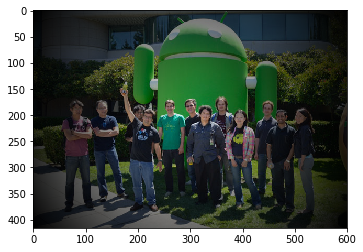

In [8]:
import math

# Your code goes here.
mid_pix_x = img.shape[0] / 2
mid_pix_y = img.shape[1] / 2

def get_dist_from_mid(x, y):
    return math.sqrt((x-mid_pix_x)**2 +(y-mid_pix_y)**2)


max_dist = get_dist_from_mid(img.shape[0], img.shape[1])

vignette_image = np.copy(img)

for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        cur_pix = vignette_image[x][y]
        dimness_factor = (1-(get_dist_from_mid(x, y)/max_dist))
        np.multiply(cur_pix,dimness_factor, out=cur_pix, casting="unsafe")

display_image(vignette_image)

**Final comments:** If you finished this section. Would your vignette implementation work in realtime? e.g. for real-time videoconferencing? This needs a really fast implementation. If you used for loops in any of your implementations, chances are that your implementation is not the fastest, but still acceptable for the purposes of this assignment. Also, for the vignette effect you could also allow the user to control the intensity of the effect, how would one implement that?

### 3. Image Filtering: Convolving Images (5pts).
Here we will experiment with image filtering through the convolution operator. These are operations where your output depends on a neighborhood of pixels as opposed to one-to-one pixel mapping eas we did in the previous section. We will use the same image as before but now will be working on grayscale.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


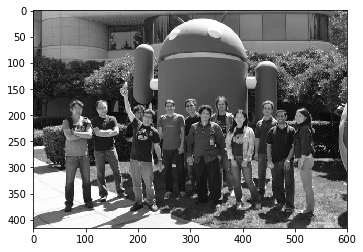

In [7]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen

# Try maybe downloading the image in case the CS webserver goes down.
img_url = 'http://www.cs.virginia.edu/~vicente/images/google_android.jpg'
img = ndimage.imread(urlopen(img_url), mode = 'RGB')

# Converting image to grayscale.
img = img.astype('float')
img = (img[:, :, 0] + img[:, :, 1] + img[:, :, 2]) / 3.0

# Plot the image.
def display_image(img):
  plt.figure()
  plt.gray()
  plt.imshow(img)
  plt.grid('off')
  plt.show()

display_image(img)

**3.1** Implement a Gaussian Blur of this image using a square neighborhood of $15\times15$ pixels with $\mu=(0, 0)$ and $\sigma=0.8$. 
Assume a symmetric 2D Gaussian distribution: e.g. $$G(x,y)=\frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}$$.  
Note: Feel free to use the scipy.signal.convolve2d function or implement your own, but no other external function or library will be allowed here aside from numpy, math, and matplotlib. Again, desired result is included here so you can check if your implementation is correct. Hint: Your kernel matrix has to be symmetric. (2pts) 

In [4]:
import numpy as np
from math import pi,exp, floor
from scipy import signal

size = 15
sigma = 0.8
gauss_kernel = np.zeros((size, size))

mid_pix_x = floor(gauss_kernel.shape[0] / 2)
mid_pix_y = floor(gauss_kernel.shape[1] / 2)

def sq_dist_from_mid(x, y):
    return (x-mid_pix_x)**2 +(y-mid_pix_y)**2

def calc_gaus(x, y):
    mid_sq_dist = sq_dist_from_mid(x, y)
    power = -1 * sq_dist_from_mid(x, y) / (2*sigma*sigma)
    return ((2*pi*sigma*sigma)**-1)*exp(power)

for x in range(gauss_kernel.shape[0]):
    for y in range(gauss_kernel.shape[1]):
        gauss_kernel[x][y] = calc_gaus(x, y)
        
blurred_image = signal.convolve2d(img, gauss_kernel, boundary="symm")

#print(gauss_kernel)
display_image(blurred_image)

NameError: name 'img' is not defined

Comments: What happens if $\sigma$ is larger? Does this make the image more blurry or less blurry? Why?

**3.2** Here we will display the spatial derivatives (gradients) of the image in the x-axis direction and the y-axis direction by showing the resultant magnitude between the two. Display as an image the magnitude of the gradients at each pixel location. Use the second order Sobel operators studied in class. Note: Feel free to use the scipy.signal.convolve2d function or implement your own, but no other external function or library will be allowed here aside from numpy, math, and matplotlib. Again, desired result is included here so you can check if your implementation is correct. (2pts)

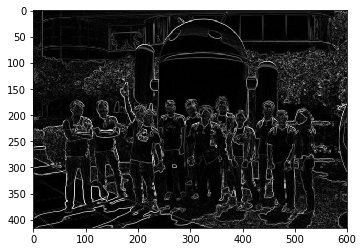

In [11]:
# Your code goes here.
sobel_x = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
# note sobel_y is the transpose of sobel_x
sobel_y =  sobel_x.T 


grad_x = signal.convolve2d(img, sobel_x)
grad_y = signal.convolve2d(img, sobel_y)

magnitude_map = np.zeros_like(img)

def get_magnitude(x, y):
    return (grad_x[x, y]**2 + grad_y[x, y]**2)**0.5

#display_image(grad_x)
#display_image(grad_y)

for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        magnitude_map[x][y] = get_magnitude(x, y)
        
display_image(magnitude_map)

**3.3** Use the above output to emphasize the boundaries of the objects in the original grayscale image. Depending on how you do it this will look more or less different so I am not going to include a sample output here, but be creative and make the boundaries be highlighted. (1pt)

In [15]:
output_image = (magnitude_map+0.5*img).clip(0, 255)
display_image(output_image)

**Final Comments:** Any of the filtering transformations in this section can be applied to color images. We can just apply the transformation to each channel individually. Try some of your implemented filters in the original RGB input using this approach. Feel free to experiment and create new filters of your own.